In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
import itertools

%matplotlib inline

import random 
kepler = pd.read_csv('Desktop/cleanData2.csv')

kepler.drop('Unnamed: 0', axis = 1,inplace=True)

kepler.drop('koi_score', inplace=True, axis=1)
kepler.dropna(inplace=True)

label = "koi_pdisposition"
y = kepler[label]
x = kepler.drop(label, axis=1)

In [2]:
train, test, target, target_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [3]:
gauss = GaussianNB()
gauss.fit(train, target)

GaussianNB()

In [5]:
##WITH FLAGS
from sklearn import metrics
gauss_pred = gauss.predict(test)
gauss_pred1 = gauss.predict(train)
score1 = metrics.accuracy_score(target_test, gauss_pred)
score2 = metrics.accuracy_score(target, gauss_pred1)
print(score1)
print(score2)

0.9921743991056456
0.9917551704863052


In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
bernoulli = BernoulliNB()

In [7]:
train, test, target, target_test = train_test_split(x, y, test_size=0.2, random_state=0)
bernoulli.fit(train, target)

BernoulliNB()

In [8]:
ber_pred = bernoulli.predict(test)
ber_pred1 = bernoulli.predict(train)
score1 = metrics.accuracy_score(target_test, ber_pred)
score2 = metrics.accuracy_score(target, ber_pred1)
print(score1)
print(score2)

0.9798770262716602
0.9773616545556176


In [9]:
def draw_confusion_matrix(y, yhat, classes):
    '''
        Draws a confusion matrix for the given target and predictions
        Adapted from scikit-learn and discussion example.
    '''
    plt.cla()
    plt.clf()
    matrix = confusion_matrix(y, yhat)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    num_classes = len(classes)
    plt.xticks(np.arange(num_classes), classes, rotation=90)
    plt.yticks(np.arange(num_classes), classes)
    
    fmt = 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

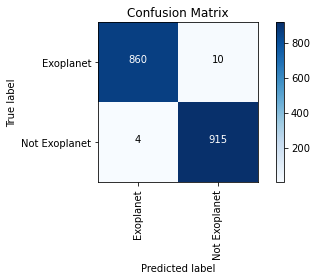

In [11]:
draw_confusion_matrix(target_test, gauss_pred, ['Exoplanet', 'Not Exoplanet'])

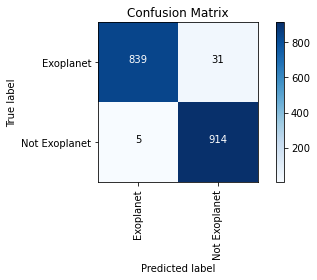

In [12]:
draw_confusion_matrix(target_test, ber_pred, ['Exoplanet', 'Not Exoplanet'])

In [13]:
##WITHOUT FLAGS
flags = [col for col in kepler.columns if 'flag' in col]
kepler2 = kepler.drop(flags, axis=1)
label = "koi_pdisposition"
y2 = kepler2[label]
x2 = kepler2.drop(label, axis=1)

In [14]:
train, test, target, target_test = train_test_split(x2, y2, test_size=0.2, random_state=0)
gauss.fit(train, target)

GaussianNB()

In [15]:
gauss_pred = gauss.predict(test)
gauss_pred1 = gauss.predict(train)
score1 = metrics.accuracy_score(target_test, gauss_pred)
score2 = metrics.accuracy_score(target, gauss_pred1)
print(score1)
print(score2)

0.650642817216322
0.6513415315818893


In [16]:
train, test, target, target_test = train_test_split(x2, y2, test_size=0.2, random_state=0)
bernoulli.fit(train, target)
ber_pred = bernoulli.predict(test)
ber_pred1 = bernoulli.predict(train)
score1 = metrics.accuracy_score(target_test, ber_pred)
score2 = metrics.accuracy_score(target, ber_pred1)
print(score1)
print(score2)

0.6948015651201789
0.7072386808272778


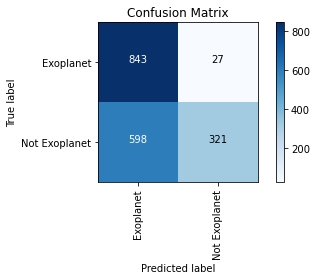

In [21]:
draw_confusion_matrix(target_test, gauss_pred, ['Exoplanet', 'Not Exoplanet'])

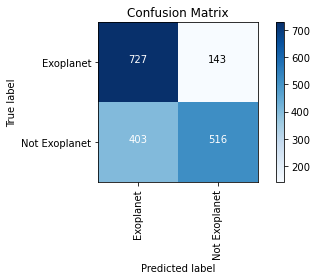

In [19]:
draw_confusion_matrix(target_test, ber_pred, ['Exoplanet', 'Not Exoplanet'])